In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import Plotting_and_Analysis_Routines as pna
import os 
cdir = os.getcwd()
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
%matplotlib inline

In [2]:
def degree_dist(grph, im_dir, ftag, fs):
    degs = [d for n, d in grph.degree()]
    degs_hist = np.histogram(degs, bins = 40)
    degsmean = np.mean(degs_hist[0])
    plt.plot(degs_hist[1][:-1], degs_hist[0], color='k')
    #plt.plot(degs_hist[1][:-1], degsmean*np.ones(np.size(degs_hist[1][:-1])), color='r')
    plt.locator_params(axis="x", nbins=4)
    plt.locator_params(axis="y", nbins=2)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Degree", fontsize=fs)
    plt.ylabel("Number of Nodes", fontsize=fs)
    plt.savefig(im_dir + "lcc_node_dist" + ftag, dpi=150, bbox_inches='tight')

In [88]:
pickle_off = open("universal_info.pickle","rb")
univ_dict = pickle.load(pickle_off)

# Just need to change these two values and the rest should carry on as needed.  
tag = 'sw'
frq = 10.
fstr = str(frq)
fstr = fstr.replace('.', 'pt')
thrshhld = .99
thrshhld_tag = str(thrshhld)
thrshhld_tag = thrshhld_tag.replace('.', 'pt')

pickle_off = open("graph_info_" + tag + ".pickle", "rb")
graph_dict = pickle.load(pickle_off)

pickle_off = open('solution_info_' + tag + "_" + fstr + ".pickle", "rb")
soln_dict = pickle.load(pickle_off)

pickle_off = open('Data_Collection_' + tag + "_" + fstr + ".pickle", "rb")
data_dict = pickle.load(pickle_off)

In [89]:
omgs = univ_dict['frequencies']
osc_amat = graph_dict['adjacency_matrix']
osc_graph = nx.from_numpy_matrix(osc_amat)

nds = univ_dict['number_of_nodes']
tf = univ_dict['tf']
dt = univ_dict['time_step']
kval = univ_dict['kval']

im_dir = cdir + "\\writeup\\images\\"

xt = soln_dict['soln']
dxt = soln_dict['deriv']
nt = soln_dict['time_steps']

skp = data_dict['skip']
taxis = data_dict['time_axis']
rprm1 = data_dict['radial_parameter1']
aprm1 = data_dict['angle_parameter1']
aprm1 += np.pi

dmd_evls = data_dict['dmd_evls']
dmd_phim = data_dict['dmd_phim']
dmd_kmodes = data_dict['dmd_kmodes']
dmd_err = data_dict['dmd_error']

# file_tag = "_" + tag + "_frq_" + fstr + "_thresh_" + thrshhld_tag + ".eps"
file_tag = "_" + tag + "_frq_" + fstr + ".eps"
nt_dmd = np.size(taxis)
ntr = nt-nt_dmd
xtr = xt[:, ntr:]
dt_xtr = dxt[:, ntr:]
dt_xt_nght = dxt[:, 0]

fs = 24 # fontsize for axis labels
nbx = 4
nby = 3

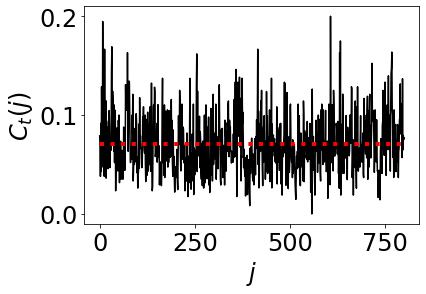

In [90]:
osc_clstr_dict = nx.clustering(osc_graph)
osc_clstrs = [cnt for n, cnt in osc_clstr_dict.items()] 
plt.plot(osc_clstrs,color='k')
plt.plot(np.mean(osc_clstrs)*np.ones(np.size(osc_clstrs)),color='r',linestyle='dotted', linewidth=4)
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel(r"$j$", fontsize=fs)
plt.ylabel(r"$C_{t}(j)$", fontsize=fs)
plt.savefig(im_dir + "osc_clustering_coeff_" + tag + ".eps", dpi=150, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


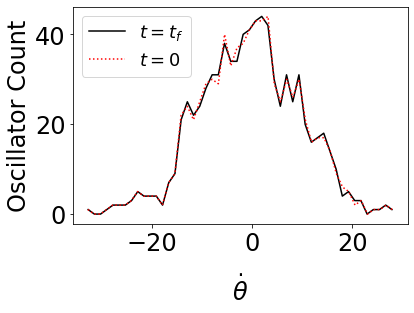

In [91]:
bcnt = 50
ohist = np.histogram(dt_xt_nght, bins=bcnt)
#avg_osc = np.mean(dt_xtr, 1)
mean_osc_veloc = np.histogram(dt_xtr[:, -1], bcnt)
plt.plot(mean_osc_veloc[1][:-1], mean_osc_veloc[0], color='k', label='$t=t_{f}$')
plt.plot(ohist[1][:-1], ohist[0], color='r', linestyle='dotted', label='$t=0$')
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel(r"$\dot{\theta}$", fontsize=fs, labelpad=20)
plt.ylabel("Oscillator Count", fontsize=fs)
plt.legend(prop={'size': 18})
plt.savefig(im_dir + "Oscillator_Distribution" + file_tag, dpi=150, bbox_inches='tight')

0.03274548806255584


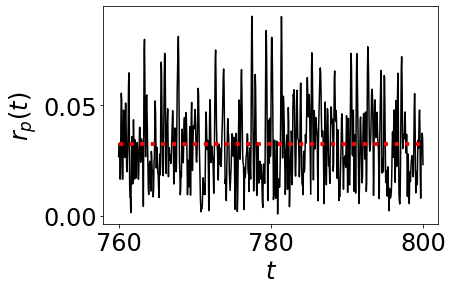

In [92]:
plt.plot(taxis, rprm1, color='k')
print(np.mean(rprm1))
plt.plot(taxis, np.mean(rprm1)*np.ones(np.size(taxis)), color='r', linestyle='dotted', linewidth=4)
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel("$t$", fontsize=fs)
plt.ylabel("$r_{p}(t)$", fontsize=fs)
plt.savefig(im_dir + "Total_Mag_Ord_Param" + file_tag, dpi=150, bbox_inches='tight')

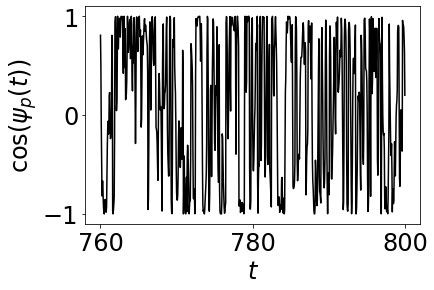

In [93]:
plt.plot(taxis, np.cos(aprm1), color='k')
#plt.plot(taxis, np.sin(aprm1), color='r')
plt.xlabel("$t$", fontsize=fs)
plt.ylabel(r"$\cos(\psi_{p}(t))$", fontsize=fs)
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.savefig(im_dir + "Total_Ang_Ord_Param" + file_tag, dpi=150, bbox_inches='tight')

0.0016390495027362984


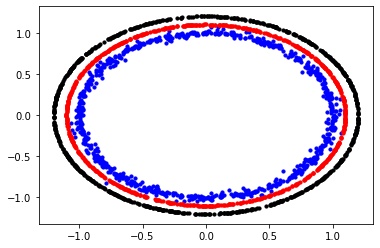

In [98]:
dmd_modecut = np.ma.log10(dmd_err) < -1.
dmd_totmodes = np.sum(dmd_modecut)
dmd_err_red = dmd_err[dmd_modecut]
dmd_evls_red = np.log(dmd_evls[dmd_modecut])/(dt*skp)
dmd_phired = dmd_phim[:, dmd_modecut]
dmd_kmodesred = dmd_kmodes[:, dmd_modecut]

recon = np.real(dmd_kmodesred @ dmd_phired.T)
true_trajec = np.zeros((2*nds, nt_dmd), dtype=np.float64)
true_trajec[:nds,:] = np.cos(xtr)
true_trajec[nds:,:] = np.sin(xtr)

plt.scatter(recon[:nds, 0], recon[nds:, 0], c='b', s=10)
plt.scatter(1.1*recon[:nds, np.int(nt_dmd/2.)], 1.1*recon[nds:, np.int(nt_dmd/2.)], c='r', s=10)
plt.scatter(1.2*recon[:nds, nt_dmd-2], 1.2*recon[nds:, nt_dmd-2], c='k', s=10)
print(np.linalg.norm(recon - true_trajec[:,:nt_dmd-1])/np.linalg.norm(true_trajec[:,:nt_dmd-1]))

Total Relative Error in DMD modes: 7.36e-01
Numer of DMD modes: 425


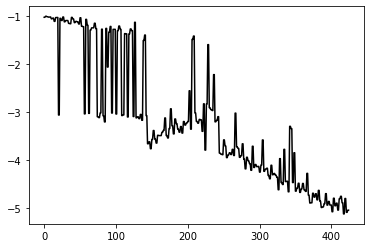

In [99]:
plt.plot(np.ma.log10(dmd_err[dmd_modecut]), color='k')
print("Total Relative Error in DMD modes: %1.2e" % np.linalg.norm(dmd_err[dmd_modecut]))
print("Numer of DMD modes: %d" % np.sum(dmd_modecut))

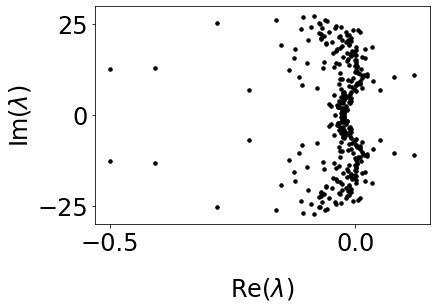

In [11]:
plt.scatter(dmd_evls_red.real, dmd_evls_red.imag, s=12, c='k')
plt.xlabel("Re$(\lambda)$", fontsize=fs, labelpad=20)
plt.ylabel("Im$(\lambda)$", fontsize=fs)
plt.locator_params(axis="x", nbins=2)
plt.locator_params(axis="y", nbins=2)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.savefig(im_dir + "DMD_Spectra" + file_tag, dpi=150, bbox_inches='tight')

In [12]:
kcormat = pna.kmat_comp(dmd_kmodesred, dmd_evls_red, dmd_totmodes, nds)
fin_graph, ndlst, cntlst, fin_modes, ndprmlst = pna.graph_comp(kcormat, xt, ntr, thrshhld) 

Number of components: 724


Sanity check making sure we haven't missed anyone: 800


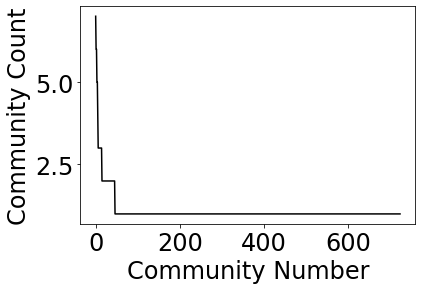

In [13]:
plt.plot(cntlst, color='k')
plt.xlabel("Community Number", fontsize=fs)
plt.ylabel("Community Count", fontsize=fs)
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.savefig(im_dir + "Cluster_Count" + file_tag, dpi=150, bbox_inches='tight')
print("Sanity check making sure we haven't missed anyone: %d" % np.sum(cntlst))

In [14]:
kcormat = kcormat[ndprmlst, :]
kcormat = kcormat[:, ndprmlst]
#plt.pcolor((np.abs(kcormat)))
#plt.colorbar()
#plt.xlabel(r"$\theta_n$")
#plt.ylabel(r"$\theta_m$")
#plt.savefig(im_dir + "Overlap_Matrix" + file_tag, dpi=150)

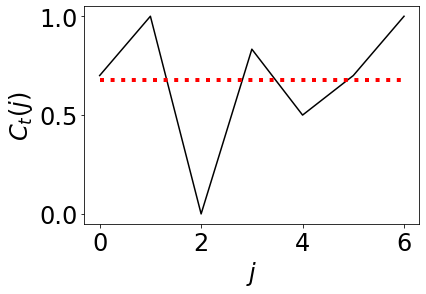

In [15]:
lcc = fin_graph.subgraph(ndlst[0])
lcc_clstr_dict = nx.clustering(lcc)
lcc_clstrs = [cnt for n, cnt in lcc_clstr_dict.items()] 
plt.plot(lcc_clstrs,color='k')
plt.plot(np.mean(lcc_clstrs)*np.ones(np.size(lcc_clstrs)),color='r',linestyle='dotted', linewidth=4)
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel(r"$j$", fontsize=fs)
plt.ylabel(r"$C_{t}(j)$", fontsize=fs)
plt.savefig(im_dir + "lcc_Clustering_coeff" + file_tag, dpi=150, bbox_inches='tight')

In [16]:
#degree_dist(lcc, im_dir, file_tag, fs)

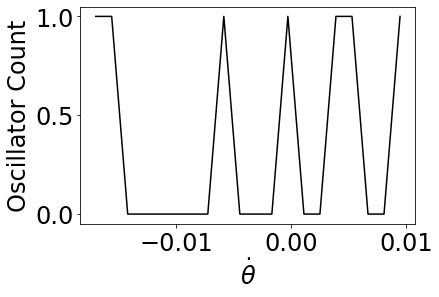

In [17]:
lcc_om_dist = np.histogram(omgs[ndlst[0]], bins=20)
plt.plot(lcc_om_dist[1][:-1], lcc_om_dist[0], color='k')
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel(r"$\dot{\theta}$", fontsize=fs)
plt.ylabel("Oscillator Count", fontsize=fs)
plt.savefig(im_dir + "Oscillator_Distribution_lcc" + file_tag, dpi=150, bbox_inches='tight')

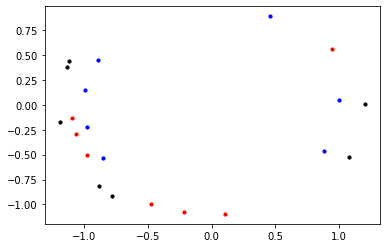

In [18]:
lcc_mode = fin_modes[0][:, :]    
cs_lcc = np.cos(lcc_mode)
ss_lcc = np.sin(lcc_mode)
plt.scatter(cs_lcc[:, 0], ss_lcc[:, 0], c='b', s=10)
plt.scatter(1.1*cs_lcc[:, np.int(nt_dmd/2.)], 1.1*ss_lcc[:, np.int(nt_dmd/2.)], c='r', s=10)
plt.scatter(1.2*cs_lcc[:, nt_dmd-1], 1.2*ss_lcc[:, nt_dmd-1], c='k', s=10)

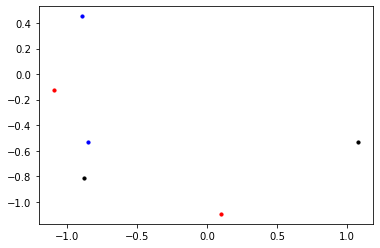

In [19]:
dt_inds_ps = dt_xtr[ndlst[0], 0] >= 0.
lcc_mode_pos = lcc_mode[dt_inds_ps, :]
cs_lcc_pos = np.cos(lcc_mode_pos)
ss_lcc_pos = np.sin(lcc_mode_pos)
plt.scatter(cs_lcc_pos[:, 0], ss_lcc_pos[:, 0], c='b', s=10)
plt.scatter(1.1*cs_lcc_pos[:, np.int(nt_dmd/2.)], 1.1*ss_lcc_pos[:, np.int(nt_dmd/2.)], c='r', s=10)
plt.scatter(1.2*cs_lcc_pos[:, nt_dmd-1], 1.2*ss_lcc_pos[:, nt_dmd-1], c='k', s=10)

In [20]:
lcc_fac = np.mean(np.exp(1j*lcc_mode), 0)
r_fac1 = np.abs(lcc_fac)
psi_fac1 = np.angle(lcc_fac) + np.pi
dt_r_fac1 = 1./(2.*dt)*(r_fac1[2:] - r_fac1[:-2])

In [21]:
lcc_fac_pos = np.mean(np.exp(1j*lcc_mode_pos), 0)
r_fac1_pos = np.abs(lcc_fac_pos)
psi_fac1_pos = np.angle(lcc_fac_pos) + np.pi
dt_r_fac1_pos = 1./(2.*dt)*(r_fac1_pos[2:] - r_fac1_pos[:-2])

0.4609668428399132


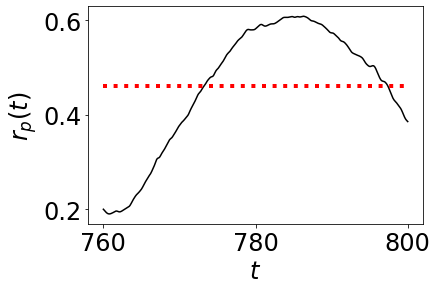

In [22]:
plt.plot(taxis, r_fac1, color='k')
print(np.mean(r_fac1))
plt.plot(taxis, np.mean(r_fac1)*np.ones(np.size(taxis)), color='r', linestyle='dotted', linewidth=4)
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel(r"$t$", fontsize=fs)
plt.ylabel(r"$r_{p}(t)$", fontsize=fs)
plt.savefig(im_dir + "rfac1_lcc" + file_tag, dpi=150, bbox_inches='tight')

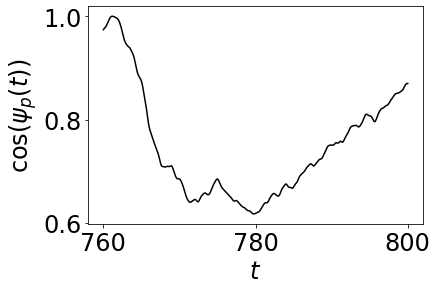

In [23]:
plt.plot(taxis, np.cos(psi_fac1), color='k')
plt.locator_params(axis="x", nbins=nbx)
plt.locator_params(axis="y", nbins=nby)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel(r"$t$", fontsize=fs)
plt.ylabel(r"$\cos(\psi_{p}(t))$", fontsize=fs)
plt.savefig(im_dir + "psifac1_lcc" + file_tag, dpi=150, bbox_inches='tight')

In [24]:
#nwin = 5
#trmat = pna.dmd_dendrite_tree(xt, 600., 800., dt, skp, nwin, thrshhld)

In [25]:
#tgraph = nx.from_numpy_matrix(trmat)
#pos = graphviz_layout(tgraph, prog="dot")
#print(nx.is_forest(tgraph))
#fig1, f1_axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(10, 8))
#nx.draw(tgraph, pos, node_size=2, width=.1)
#plt.savefig(im_dir + "community_graph" + file_tag, dpi=150)

In [26]:
#comps = nx.connected_components(tgraph)
#ndlst = [list(c) for c in sorted(comps, key=len, reverse=True)]
#lcc_tgraph = tgraph.subgraph(ndlst[0])
#print(nx.is_tree(lcc_tgraph))

In [27]:
#pos = graphviz_layout(lcc_tgraph, prog="dot")
#fig1, f1_axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(10, 8))
#nx.draw(lcc_tgraph, pos, node_size=2, width=.1)
#plt.savefig(im_dir + "lcc_community_graph" + file_tag, dpi=150)

In [28]:
#print(nx.number_of_nodes(lcc_tgraph))
#print(nx.number_of_nodes(tgraph))